In [5]:
%pip install --upgrade pip
%pip install amazon-braket-sdk==1.37.0

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.6 MB/s eta 0:00:0000:01
  Attempting uninstall: amazon-braket-sdk
    Found existing installation: amazon-braket-sdk 1.38.0
    Uninstalling amazon-braket-sdk-1.38.0:
      Successfully uninstalled amazon-braket-sdk-1.38.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install --upgrade amazon-braket-schemas
!qbraid jobs disable qbraid_sdk

Note: you may need to restart the kernel to use updated packages.
 You have already disabled qBraid Quantum Jobs in the qbraid_sdk environment.


In [1]:
# TODO:
# Choose a suitable value of repcnt
# Replace ALL simulator lines with functions for running on hardware (to be done on Qbraid)

import cirq
import qbraid
from qbraid import interface
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def prep(sys,state):
    for i in range(len(state)):
        if state[i]=='1':
            yield cirq.X(sys[i])

def zz_pump(sys,env,p,state):
    yield from prep(sys,state)
    yield cirq.CNOT(sys[1],sys[0])
    yield cirq.X(env[0])
    yield cirq.CNOT(sys[0],env[0])
    yield cirq.Rx(rads=np.arccos(1-2*p)).on(sys[0]).controlled_by(env[0])
    yield cirq.CNOT(sys[0],env[0])
    yield cirq.H(sys[1])
    #yield cirq.measure(sys,key = 'zz'+state)

def xx_pump(sys,env,p,state):
    yield from prep(sys,state)
    yield cirq.CNOT(sys[1],sys[0])
    yield cirq.H(sys[1])
    yield cirq.X(env[0])
    yield cirq.CNOT(sys[1],env[0])
    yield cirq.Rx(rads=np.arccos(1-2*p)).on(sys[1]).controlled_by(env[0])
    yield cirq.CNOT(sys[1],env[0])
    #yield cirq.measure(sys,key = 'xx'+state)

def zz_xx_pump(sys,env,p,state):
    yield from prep(sys,state)
    yield cirq.CNOT(sys[1],sys[0])
    yield cirq.X(env[0])
    yield cirq.CNOT(sys[0],env[0])
    yield cirq.Rx(rads=np.arccos(1-2*p)).on(sys[0]).controlled_by(env[0])
    yield cirq.CNOT(sys[0],env[0])
    yield cirq.H(sys[1])
    yield cirq.X(env[1])
    yield cirq.CNOT(sys[1],env[1])
    yield cirq.Rx(rads=np.arccos(1-2*p)).on(sys[1]).controlled_by(env[1])
    yield cirq.CNOT(sys[1],env[1])
    #yield cirq.measure(sys,key = 'zzxx'+state)

In [2]:
probs = np.linspace(0,1,num=5)
repcnt = 100

In [4]:
!qbraid jobs enable qbraid_sdk

You have already enabled qBraid Quantum Jobs in the qbraid_sdk environment.


In [3]:
from qbraid import get_devices
get_devices()

Provider,Name,qBraid ID,Status
AWS,DM1,aws_dm_sim,●
AWS,SV1,aws_sv_sim,●
AWS,TN1,aws_tn_sim,●
IBM,Belem,ibm_q_belem,●
IBM,Ext. stabilizer simulator,ibm_q_simulator_extended_stabilizer,●
IBM,Jakarta,ibm_q_jakarta,○
IBM,Lagos,ibm_q_lagos,●
IBM,Lima,ibm_q_lima,●
IBM,MPS simulator,ibm_q_simulator_mps,●
IBM,Manila,ibm_q_manila,●


In [4]:
# import cirq_ionq as ionq
# API_KEY = 'aSgKZjVlUqbKNcrGFIIDBPQuJnlaZcoA'
# service = ionq.Service(api_key=API_KEY)

# import qbraid
from qbraid import device_wrapper, job_wrapper, get_jobs
# from qbraid import verify_config

# qbraid_device = device_wrapper("aws_ionq")
# qbraid_device.info

In [17]:
# from inspect import getsource
# print(getsource(qbraid.devices.aws.AwsQuantumTaskWrapper))
# print(getsource(qbraid.devices.aws.AwsQuantumTaskWrapper.result))

In [18]:
# help(qbraid.api)

In [19]:
# # help(qbraid)
# print(dir(qbraid.exceptions))

In [20]:
# qbraid.api.verify_config("AWS")

In [5]:
# ionq_id = "aws_ionq"
ionq_id = "aws_sv_sim"
qbraid_aws_device = device_wrapper(ionq_id)
qbraid_aws_device.vendor_dlo
qbraid_aws_device.info

{'numberQubits': 34,
 'objRef': None,
 'pendingJobs': 'N/D',
 'availabilityCD': '05:45:28',
 'visibility': 'public',
 'qbraid_id': 'aws_sv_sim',
 'name': 'SV1',
 'provider': 'AWS',
 'paradigm': 'gate-based',
 'type': 'Simulator',
 'vendor': 'AWS',
 'runPackage': 'braket',
 'status': 'ONLINE',
 'createdAt': '2022-03-10T04:08:20.639Z',
 'updatedAt': '2023-05-05T18:14:33.390Z',
 '__v': 0,
 'processorType': 'State vector simulator'}

In [11]:
# print(getsource(qbraid.devices.aws.AwsQuantumTaskWrapper))

NameError: name 'getsource' is not defined

In [1]:
def batch_1(p):
    # env = [cirq.LineQubit(21),cirq.LineQubit(22),
    #       cirq.LineQubit(23),cirq.LineQubit(24),cirq.LineQubit(25), cirq.LineQubit(26),cirq.LineQubit(27), cirq.LineQubit(28),
    #       cirq.LineQubit(29),cirq.LineQubit(30),cirq.LineQubit(31),cirq.LineQubit(32),cirq.LineQubit(33),cirq.LineQubit(34)]
    # sys = [cirq.LineQubit(0),cirq.LineQubit(1),cirq.LineQubit(2),cirq.LineQubit(3),cirq.LineQubit(4),cirq.LineQubit(5), cirq.LineQubit(6), 
    #        cirq.LineQubit(7),cirq.LineQubit(8),cirq.LineQubit(9),cirq.LineQubit(10),cirq.LineQubit(11), cirq.LineQubit(12),
    #        cirq.LineQubit(13),cirq.LineQubit(14),cirq.LineQubit(15),cirq.LineQubit(16),cirq.LineQubit(17), cirq.LineQubit(18),
    #       cirq.LineQubit(19),cirq.LineQubit(20)]
    # circ = cirq.Circuit()
    env = [cirq.LineQubit(6),cirq.LineQubit(7),cirq.LineQubit(8),cirq.LineQubit(9),cirq.LineQubit(10)]
    sys = [cirq.LineQubit(0),cirq.LineQubit(1),cirq.LineQubit(2),cirq.LineQubit(3),cirq.LineQubit(4),cirq.LineQubit(5)]
    circ = cirq.Circuit()
    circ.append(zz_xx_pump(sys[0:2],env[0:2],p,'00'))
    circ.append(zz_xx_pump(sys[2:4],env[2:4],p,'01'))
    circ.append(zz_pump(sys[4:6],env[4:5],p,'00'))
    
#     circ.append(zz_xx_pump(sys[7:9],env[5:7],p,'10'))
#     circ.append(zz_xx_pump(sys[9:11],env[7:9],p,'11'))
#     circ.append(zz_pump(sys[11:13],env[9:10],p,'01'))
    
#     circ.append(zz_pump(sys[13:15],env[10:11],p,'10'))
#     circ.append(zz_pump(sys[15:17],env[11:12],p,'11'))
#     circ.append(xx_pump(sys[17:19],env[12:13],p,'00'))
    
#     circ.append(xx_pump(sys[19:21],env[13:14],p,'01'))
    # print(circ)
    # print('******************************************')
    # circ1 = qbraid.transpiler.cirq_braket.to_braket(circ)
    # print(circ1)
    # circ.append(cirq.measure(cirq.LineQubit.range(11),key='meas'))
    # circ1 = qbraid.interface.convert_to_contiguous(circ)
    # simulator = cirq.Simulator()
    # results = simulator.run(circ,repetitions=repcnt)
    #############
    
    # job = service.create_job(circuit=circuit, target='qpu', repetitions=repcnt)
    # job_id = job.job_id()
    # print(job_id)
    # same_job = service.get_job(job_id=job_id)
    # if same_job == 'completed':
    #     results = same_job.results()
    #     # print(results)
    # results.to_cirq_result()
    
    #############
    qbraid_aws_job = qbraid_aws_device.run(circ, shots=repcnt)
    return qbraid_aws_job
    #############
    # hist1 = results.histogram(key='zzxx00')
    # hist2 = results.histogram(key='zzxx01')
    # hist3 = results.histogram(key='zz00')
    # return hist1,hist2,hist3


In [23]:

def batch_2(p):
    env = [cirq.LineQubit(6),cirq.LineQubit(7),cirq.LineQubit(8),cirq.LineQubit(9),cirq.LineQubit(10)]
    sys = [cirq.LineQubit(0),cirq.LineQubit(1),cirq.LineQubit(2),cirq.LineQubit(3),cirq.LineQubit(4),cirq.LineQubit(5)]
    circ = cirq.Circuit()
    circ.append(zz_xx_pump(sys[0:2],env[0:2],p,'10'))
    circ.append(zz_xx_pump(sys[2:4],env[2:4],p,'11'))
    circ.append(zz_pump(sys[4:6],env[4:5],p,'01'))
    # simulator = cirq.Simulator()
    # results = simulator.run(circ,repetitions=repcnt)
    #############
    
    # job = service.create_job(circuit=circuit, target='qpu', repetitions=repcnt)
    # job_id = job.job_id()
    # print(job_id)
    # same_job = service.get_job(job_id=job_id)
    # if same_job == 'completed':
    #     results = same_job.results()
    #     # print(results)
    # results.to_cirq_result()
    
    
    
    #############
    qbraid_aws_job = qbraid_aws_device.run(circ, shots=repcnt)
    aws_result = qbraid_aws_job.result()
    # results = aws_result.to_cirq_result()
    # data2 = results.data
    # filename = './data2/'+str(np.around(p,3))+'.csv'
    # data2.to_csv(filename)
    #############
    # hist1 = results.histogram(key='zzxx10')
    # hist2 = results.histogram(key='zzxx11')
    # hist3 = results.histogram(key='zz01')
    # return hist1,hist2,hist3


In [27]:
# qjob10 = batch_1(probs[0])

In [28]:
print(dir(type(qjob10)))
# print(qjob10.status())
# print(qjob10.id)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_get_status', '_get_vendor_jlo', '_status', 'cancel', 'device', 'id', 'metadata', 'result', 'status', 'vendor_jlo', 'vendor_job_id', 'wait_for_final_state']


In [1]:
aws_result = qjob10.result()
print(aws_result)
# results = aws_result.to_cirq_result()
# data1 = aws_result.data
# filename = './data1/'+str(np.around(p,3))+'.csv'
# data1.to_csv(filename)

NameError: name 'qjob10' is not defined

In [10]:
from qbraid import get_jobs
get_jobs(filters={"qbraidDeviceId": "aws_sv_sim"})

In [6]:
from qbraid import job_wrapper
saved_job_id = 'aws_sv_sim-jessjohnbritto-qjob-u8nzibwhq9o7g5ga2fic'
qjob = job_wrapper(saved_job_id)

In [7]:
qresult = qjob.result()

In [8]:
qresult.measurement_counts()

{'0110001000111100011111111111111111': 1,
 '0011011000111101001111111111111111': 1,
 '0010011001111101001011111111111111': 1,
 '0110011001101001011011111111111111': 1,
 '0011011100111101001011111111111111': 1,
 '0011011100101100001011111111111111': 1,
 '0110011100101101001011111111111111': 1,
 '0011011100111100011111111111111111': 1,
 '0011001000111001001111111111111111': 1,
 '0010001101111001001011111111111111': 1,
 '0010011001101100011111111111111111': 1,
 '0110001001101001001111111111111111': 1,
 '0010001101111101011011111111111111': 1,
 '0110001001111001001111111111111111': 1,
 '0010001100101001011111111111111111': 1,
 '0111001000111101011111111111111111': 1,
 '0011011001101001001011111111111111': 1,
 '0011001100101100001011111111111111': 1,
 '0110011100111101011011111111111111': 1,
 '0111001100101100011111111111111111': 1,
 '0011001000101000011111111111111111': 1,
 '0110001001111000001011111111111111': 1,
 '0010001000111100011111111111111111': 1,
 '01110111001111000110111111111111

In [14]:
qresult.measurements()

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1]])

In [3]:
# qresult.plot_counts()

In [31]:
# results = aws_result.to_cirq_result()
# print(results)

AttributeError: 'AwsGateModelResultWrapper' object has no attribute 'to_cirq_result'

In [32]:
# data1 = aws_result.data
# filename = './data1/'+str(np.around(p,3))+'.csv'
# data1.to_csv(filename)

AttributeError: 'AwsGateModelResultWrapper' object has no attribute 'data'

In [4]:
# fresult = aws_result.measurement_counts()
# print(fresult)
# plt = aws_result.plot_counts()
# plt.show()

In [34]:
print(type(fresult))

<class 'dict'>


In [4]:
resultsdict10 = {'0110001000111100011111111111111111': 1, '0011011000111101001111111111111111': 1, '0010011001111101001011111111111111': 1, '0110011001101001011011111111111111': 1, '0011011100111101001011111111111111': 1, '0011011100101100001011111111111111': 1, '0110011100101101001011111111111111': 1, '0011011100111100011111111111111111': 1, '0011001000111001001111111111111111': 1, '0010001101111001001011111111111111': 1, '0010011001101100011111111111111111': 1, '0110001001101001001111111111111111': 1, '0010001101111101011011111111111111': 1, '0110001001111001001111111111111111': 1, '0010001100101001011111111111111111': 1, '0111001000111101011111111111111111': 1, '0011011001101001001011111111111111': 1, '0011001100101100001011111111111111': 1, '0110011100111101011011111111111111': 1, '0111001100101100011111111111111111': 1, '0011001000101000011111111111111111': 1, '0110001001111000001011111111111111': 1, '0010001000111100011111111111111111': 1, '0111011100111100011011111111111111': 1, '0010011001101101011011111111111111': 1, '0010011001101001001011111111111111': 1, '0010011000101001001011111111111111': 1, '0011001100101101001111111111111111': 1, '0010011100101101001111111111111111': 1, '0111001101101100011111111111111111': 1, '0110001001111100001011111111111111': 1, '0011001101101101001011111111111111': 1, '0011011000111000001111111111111111': 1, '0011011000101101011011111111111111': 1, '0011011101111101011011111111111111': 1, '0011001000111101001111111111111111': 1, '0011001001101001011111111111111111': 1, '0011011100111100001011111111111111': 1, '0010001001101000001011111111111111': 1, '0011001001111101011111111111111111': 1, '0011001000111000011011111111111111': 1, '0111011000111100011011111111111111': 1, '0110011000101000011111111111111111': 1, '0011011101111100001111111111111111': 1, '0110001101111101001011111111111111': 1, '0110011101111000011111111111111111': 1, '0110011100111001001011111111111111': 1, '0110001100101001011011111111111111': 1, '0010001100111101001011111111111111': 1, '0010001100111101011011111111111111': 1, '0011001101101101001111111111111111': 1, '0010001100111101011111111111111111': 1, '0011001000101000001011111111111111': 1, '0110011000111001011111111111111111': 1, '0010011001101100011011111111111111': 1, '0111011100101100001111111111111111': 1, '0110001100101101011111111111111111': 1, '0111001001111000011111111111111111': 1, '0011011001111101011111111111111111': 1, '0111001100111101001011111111111111': 1, '0010011101101001001011111111111111': 1, '0110011001111000011011111111111111': 1, '0010011000101101001011111111111111': 1, '0111011101111000011111111111111111': 1, '0110011000101001011111111111111111': 1, '0010011000111100011111111111111111': 1, '0111001101111000011111111111111111': 1, '0011011001111001011011111111111111': 1, '0111001000101001011011111111111111': 1, '0111001100111101001111111111111111': 1, '0111011001111000001111111111111111': 1, '0011001001111001001111111111111111': 1, '0110001100111101001111111111111111': 1, '0011001000111000011111111111111111': 1, '0110001000111000011011111111111111': 1, '0110001000101100001111111111111111': 1, '0011001101101000011011111111111111': 1, '0111001000111000001111111111111111': 1, '0010001000111000001111111111111111': 1, '0010001001101000011011111111111111': 1, '0110011000111001001111111111111111': 1, '0111001100111001001011111111111111': 1, '0111001000111101011011111111111111': 1, '0011011100111000001011111111111111': 1, '0010011001111001011111111111111111': 1, '0111001000101101011011111111111111': 1, '0110001000101000001111111111111111': 1, '0111001000111100011011111111111111': 1, '0010001100101001011011111111111111': 1, '0011001000111001001011111111111111': 1, '0011001100101101001011111111111111': 1, '0111001101101101011011111111111111': 1, '0011001100101100011011111111111111': 1, '0111011001101100001111111111111111': 1, '0011011000111000011111111111111111': 1, '0110001000111000001111111111111111': 1, '0110001101101000001011111111111111': 1, '0111011101101000001111111111111111': 1, '0010001001111001011011111111111111': 1, '0010001101111000011111111111111111': 1}

In [12]:
zzxx00p0,zzxx01p0,zzxx10p0,zzxx11p0 = Counter(),Counter(),Counter(),Counter()

for key,cnt in resultsdict10.items():
    k1 = int(key[1:3],base=2)
    k2 = int(key[3:5],base=2)
    k3 = int(key[7:9],base=2)
    k4 = int(key[9:11],base=2)
    zzxx00p0[k1]+=cnt
    zzxx01p0[k2]+=cnt
    zzxx10p0[k3]+=cnt
    zzxx11p0[k4]+=cnt
zzxxp0 = (zzxx00p0+zzxx01p0+zzxx10p0+zzxx11p0)
for key,cnt in zzxxp0.items():
    zzxxp0[key] = cnt/(4*repcnt)
print(zzxxp0)

Counter({1: 0.285, 0: 0.26, 2: 0.24, 3: 0.215})


In [13]:
zz00p0,zz01p0,zz10p0,zz11p0 = Counter(),Counter(),Counter(),Counter()

for key,cnt in resultsdict10.items():
    k1 = int(key[5:7],base=2)
    k2 = int(key[11:13],base=2)
    k3 = int(key[13:15],base=2)
    k4 = int(key[15:17],base=2)
    zz00p0[k1]+=cnt
    zz01p0[k2]+=cnt
    zz10p0[k3]+=cnt
    zz11p0[k4]+=cnt
zzp0 = (zz00p0+zz01p0+zz10p0+zz11p0)
for key,cnt in zzp0.items():
    zzp0[key] = cnt/(4*repcnt)
print(zzp0)

Counter({2: 0.26, 1: 0.2525, 3: 0.2475, 0: 0.24})


In [ ]:
# batch_1(probs[1])

In [ ]:
# batch_1(probs[2])

In [ ]:
# batch_1(probs[3])

In [ ]:
# batch_1(probs[4])

In [ ]:
# batch_2(probs[0])

In [ ]:
# batch_2(probs[1])

In [ ]:
# batch_2(probs[2])

In [ ]:
# batch_2(probs[3])

In [ ]:
# batch_2(probs[4])

In [ ]:

# def batch_3(p):
#     env = [cirq.LineQubit(0),cirq.LineQubit(3),cirq.LineQubit(6)]
#     sys = [cirq.LineQubit(1),cirq.LineQubit(2),cirq.LineQubit(4),cirq.LineQubit(5),cirq.LineQubit(7),cirq.LineQubit(8)]
#     circ = cirq.Circuit()
#     circ.append(zz_pump(sys[0:2],env[0:1],p,'10'))
#     circ.append(zz_pump(sys[2:4],env[1:2],p,'11'))
#     circ.append(xx_pump(sys[4:6],env[2:3],p,'00'))
#     simulator = cirq.Simulator()
#     results = simulator.run(circ,repetitions=repcnt)
#     #############
    
#     # job = service.create_job(circuit=circuit, target='qpu', repetitions=repcnt)
#     # job_id = job.job_id()
#     # print(job_id)
#     # same_job = service.get_job(job_id=job_id)
#     # if same_job == 'completed':
#     #     results = same_job.results()
#     #     # print(results)
#     # results.to_cirq_result()
    
#     #############
#     # qbraid_aws_job = qbraid_aws_device.run(circ, shots=repcnt)
#     # aws_result = qbraid_aws_job.result()
#     # results = aws_result.to_cirq_result()
#     data3 = results.data
#     data3.to_csv('data3.csv')
#     #############
#     # hist1 = results.histogram(key='zz10')
#     # hist2 = results.histogram(key='zz11')
#     # hist3 = results.histogram(key='xx00')
#     # return hist1,hist2,hist3

# def batch_4(p):
#     env = [cirq.LineQubit(0),cirq.LineQubit(3),cirq.LineQubit(6)]
#     sys = [cirq.LineQubit(1),cirq.LineQubit(2),cirq.LineQubit(4),cirq.LineQubit(5),cirq.LineQubit(7),cirq.LineQubit(8)]
#     circ = cirq.Circuit()
#     circ.append(xx_pump(sys[0:2],env[0:1],p,'01'))
#     circ.append(xx_pump(sys[2:4],env[1:2],p,'10'))
#     circ.append(xx_pump(sys[4:6],env[2:3],p,'11'))
#     simulator = cirq.Simulator()
#     results = simulator.run(circ,repetitions=repcnt)
#     #############
    
#     # job = service.create_job(circuit=circuit, target='qpu', repetitions=repcnt)
#     # job_id = job.job_id()
#     # print(job_id)
#     # same_job = service.get_job(job_id=job_id)
#     # if same_job == 'completed':
#     #     results = same_job.results()
#     #     # print(results)
#     # results.to_cirq_result()
    
#     #############
#     # qbraid_aws_job = qbraid_aws_device.run(circ, shots=repcnt)
#     # aws_result = qbraid_aws_job.result()
#     # results = aws_result.to_cirq_result()
#     data4 = results.data
#     data4.to_csv('data4.csv')
#     #############
#     # hist1 = results.histogram(key='xx01')
#     # hist2 = results.histogram(key='xx10')
#     # hist3 = results.histogram(key='xx11')
#     # return hist1,hist2,hist3

In [12]:
# def get_results(p):
#     hists1 = batch_1(p)
#     hists2 = batch_2(p)
#     # hists3 = batch_3(p)
#     # hists4 = batch_4(p)
#     final_hist_zzxx = (hists1[0]+hists1[1]+hists2[0]+hists2[1])
#     for x in final_hist_zzxx:
#         final_hist_zzxx[x]/=(4*repcnt)
#     final_hist_zz = (hists1[2]+hists2[2]+hists3[0]+hists3[1])
#     for x in final_hist_zz:
#         final_hist_zz[x]/=(4*repcnt)
#     final_hist_xx = (hists3[2]+hists4[0]+hists4[1]+hists4[2])
#     for x in final_hist_xx:
#         final_hist_xx[x]/=(4*repcnt)
#     return final_hist_zzxx,final_hist_zz,final_hist_xx

In [16]:
# hists_p = [get_results(p) for p in probs] #[zzxx,zz,xx]

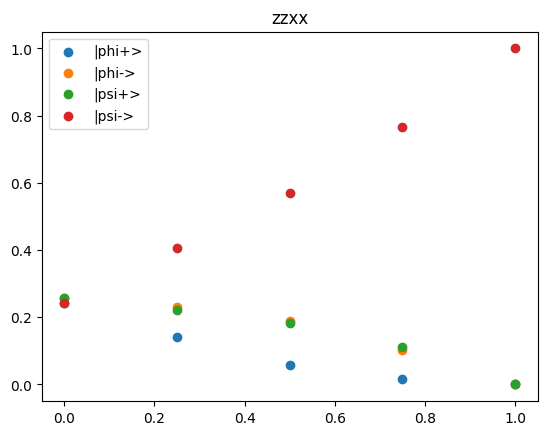

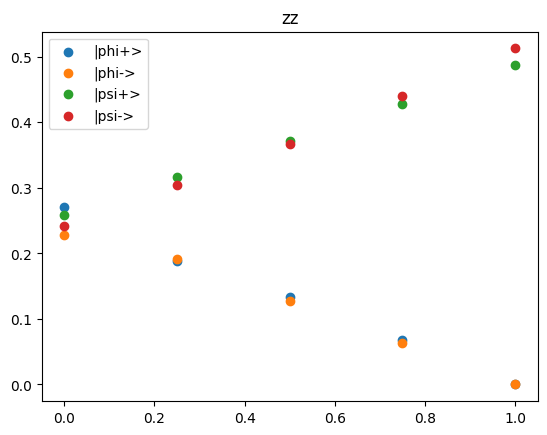

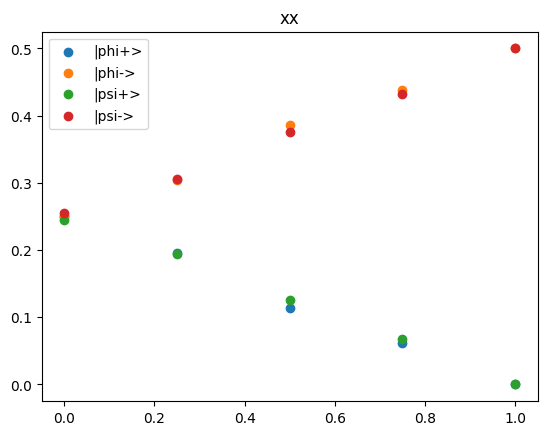

In [ ]:
# plt_titles = ['zzxx','zz','xx']
# for j in range(3): #loop over pump
#     pops = [[],[],[],[]]
#     for i in range(4): #loop over bell state
#         for counts in hists_p:
#             pops[i].append(counts[j][i])
#     plt.title(plt_titles[j])
#     plt.scatter(probs,pops[0],label='|phi+>')
#     plt.scatter(probs,pops[1],label='|phi->')
#     plt.scatter(probs,pops[2],label='|psi+>')
#     plt.scatter(probs,pops[3],label='|psi->')
#     plt.legend()
#     plt.show()